# Applies politicization and does calculation

In [1]:
# import required modules and set up environment
import os

# replace file path below with your own local convokit
os.chdir('../../')

import convokit
from convokit import Corpus, PolTracker
import nltk

In [2]:
# load corpus, this takes a long time so you can also use a different corpus as a test
corpus = convokit.Corpus(filename='/Users/calebchiam/Documents/politics-filtered-labelled')
#corpus = convokit.Corpus(filename=convokit.download("iq2-corpus"))

In [3]:
corpus.print_summary_stats()

Number of Users: 289890
Number of Utterances: 3237456
Number of Conversations: 94768


In [4]:
pt = PolTracker()
corpus = pt.transform(corpus)

In [5]:
shooting_timestamps = {
 'Fort Hood shooting': (1257397200, 1258088400),
 'Binghamton shootings': (1238731200, 1239422400),
 'Geneva County massacre': (1236657600, 1237348800),
 'Sandy Hook Elementary School shooting': (1355461200, 1356152400),
 'Aurora theater shooting': (1342756800, 1343448000),
 'Washington Navy Yard shooting': (1379304000, 1379995200),
 'San Bernardino attack': (1449032400, 1449723600),
 'Orlando nightclub shooting': (1465704000, 1466395200),
 'Las Vegas shooting': (1506830400, 1507521600),
 'Sutherland Springs church shooting': (1509854400, 1510545600),
 'Stoneman Douglas High School shooting': (1518584400, 1519275600),
 'Santa Fe High School shooting': (1526616000, 1527307200)}

In [6]:
def identify_bin_by_timestamp(bins, timestamp):
    for time_bin in bins:
        if time_bin[0] <= timestamp <= time_bin[1]:
            return time_bin
    return None

In [7]:
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def get_counts_over_time(corpus, event, duration, bin_size):
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['event'] == event and utt.meta['valid']]
    min_timestamp = min([utt.timestamp for utt in utts])
    num_bins = duration // bin_size
    bins = [(min_timestamp, min_timestamp + ((i+1)*bin_size) - 1) for i in range(num_bins)]
    
    bin_counts = defaultdict(int)
    
    for utt in utts:
        time_bin = identify_bin_by_timestamp(bins, utt.timestamp)
        if time_bin is not None:
            bin_counts[time_bin] += 1
    
    y = list(bin_counts.values())
    x = [i+1 for i in range(num_bins)]
    return y

In [9]:
import numpy as np

In [10]:
def get_scores_over_time(corpus, event, duration, bin_size):
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['event'] == event and utt.meta['valid']]
    min_timestamp = min([utt.timestamp for utt in utts])
    num_bins = duration // bin_size
    bins = [(min_timestamp, min_timestamp + ((i+1)*bin_size) - 1) for i in range(num_bins)]
    
    bin_values = defaultdict(list)
    
    for utt in utts:
        time_bin = identify_bin_by_timestamp(bins, utt.timestamp)
        if time_bin is not None:
            bin_values[time_bin].append(utt.meta['political'])
    
    for time_bin, values in bin_values.items():
        bin_values[time_bin] = np.mean(values)
    
    y = list(bin_values.values())
    x = [i+1 for i in range(num_bins)]
    return y

In [11]:
hour = 60*60
threehour = 3*hour
sixhour = 6*hour
halfday = 12*hour
day = 24*hour
week = 7*day

In [12]:
import pandas as pd
from itertools import product

In [95]:
counts_over_time_all = [(event, get_counts_over_time(corpus, event, week, threehour)) for event in shooting_timestamps]
scores_over_time_all = [(event, get_scores_over_time(corpus, event, week, threehour)) for event in shooting_timestamps]

In [96]:
df = pd.DataFrame()

counts_data = []
scores_data = []

for counts_over_time in counts_over_time_all:
    event = counts_over_time[0]
    counts = counts_over_time[1]
    for idx, count in enumerate(counts):
        counts_data.append([event, idx+1, count])

for scores_over_time in scores_over_time_all:
    event = scores_over_time[0]
    scores = scores_over_time[1]
    for idx, score in enumerate(scores):
        scores_data.append([event, idx+1, score])

In [98]:
counts_df = pd.DataFrame(counts_data, columns=['event', 'time_bin', 'count'])

In [99]:
scores_df = pd.DataFrame(scores_data, columns=['event', 'time_bin', 'score'])

In [100]:
%matplotlib qt5
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.FacetGrid(data=counts_df, col="event", hue='event', col_wrap=4)
g = g.map(plt.plot, "time_bin", "count")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Number of utterances per time bin 7 days after each mass shooting')
 
plt.show()


In [101]:
%matplotlib qt5
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.FacetGrid(data=scores_df, col="event", hue='event', col_wrap=4)
g = g.map(plt.plot, "time_bin", "score")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('% of utterances that are politicized per time bin 7 days after each mass shooting')
 
plt.show()


In [69]:
sns.lineplot(data=scores_df.groupby('3hour').mean())

In [31]:
event_vals = defaultdict(list)
for utt in corpus.iter_utterances():
    if utt.meta['valid']:
        event_vals[utt.meta['event']].append(utt.meta['political'])

In [64]:
scores_df

,event,3hour,score
0,Fort Hood shooting,1,0.333333
1,Fort Hood shooting,2,0.263889
2,Fort Hood shooting,3,0.282132
3,Fort Hood shooting,4,0.291473
4,Fort Hood shooting,5,0.277259
5,Fort Hood shooting,6,0.235294
6,Fort Hood shooting,7,0.333333
7,Fort Hood shooting,8,0.170732
8,Binghamton shootings,1,0.500000
9,Binghamton shootings,2,0.500000


In [33]:
event_vals = {k: np.mean(v) for k, v in event_vals.items()}

In [34]:
event_vals

{'San Bernardino attack': 0.2800905399729314,
 'Orlando nightclub shooting': 0.23818716675859533,
 'Sandy Hook Elementary School shooting': 0.2023110482254451,
 'Stoneman Douglas High School shooting': 0.24529588032115654,
 'Las Vegas shooting': 0.24439200784506007,
 'Sutherland Springs church shooting': 0.21088660476082147,
 'Geneva County massacre': 0.24359816152330926,
 'Washington Navy Yard shooting': 0.2909852152296219,
 'Fort Hood shooting': 0.2300942476438089,
 'Aurora theater shooting': 0.22747636754625689,
 None: 0.19678261103489092,
 'Binghamton shootings': 0.17733268197361993,
 'Santa Fe High School shooting': 0.23519359345374713}

In [39]:
event_ordered = [k[0] for k in sorted(list(shooting_timestamps.items()), key = lambda x: x[1][0])]

In [40]:
scores_ordered = [event_vals[event] for event in event_ordered]

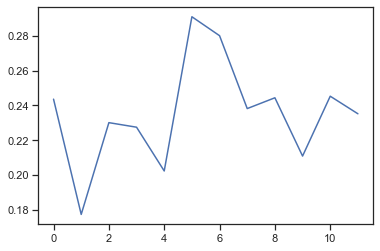

In [41]:
sns.lineplot(x=range(len(scores_ordered)), y=scores_ordered)